# **Store sale & profit analysis**

 Evaluating the sales and profit performance of a retail store is a crucial task aimed at gaining valuable insights into its overall success. By thoroughly analyzing sales and profit data, businesses can pinpoint opportunities for enhancement and make well-informed choices to optimize their strategies in operations, pricing, marketing, and inventory management. These data-driven decisions not only contribute to increased revenue but also pave the way for sustained growth and success in the competitive retail landscape.

 Dataset: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

 For this task, we have the following datas:

Row ID => Unique ID for each row.

Order ID => Unique Order ID for each Customer.

Order Date => Order Date of the product.

Ship Date => Shipping Date of the Product.

Ship Mode=> Shipping Mode specified by the Customer.

Customer ID => Unique ID to identify each Customer.

Customer Name => Name of the Customer.

Segment => The segment where the Customer belongs.

Country => Country of residence of the Customer.

City => City of residence of of the Customer.

State => State of residence of the Customer.

Postal Code => Postal Code of every Customer.

Region => Region where the Customer belong.

Product ID => Unique ID of the Product.

Category => Category of the product ordered.

Sub-Category => Sub-Category of the product ordered.

Product Name => Name of the Product.

Sales => Sales of the Product.

Quantity => Quantity of the Product.

Discount => Discount provided.

Profit => Profit/Loss incurred.

**Importing libraries**

In [174]:
import pandas as pd
import matplotlib.pyplot as plt


Importing dataset

In [175]:
data = pd.read_csv("Superstore.csv", encoding='latin-1')
print(data.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [176]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [177]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [178]:
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Let's remove the columns we won't necessarily use in our analysis.

In [179]:
new_data = data.drop(['Order ID','Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Country', 'City', 'State', 'Postal Code',
                      'Region', 'Product ID', 'Product Name', 'Quantity', 'Discount'], axis=1)
new_data

,Row ID,Order Date,Segment,Category,Sub-Category,Sales,Profit
0,1,11/8/2016,Consumer,Furniture,Bookcases,261.9600,41.9136
1,2,11/8/2016,Consumer,Furniture,Chairs,731.9400,219.5820
2,3,6/12/2016,Corporate,Office Supplies,Labels,14.6200,6.8714
3,4,10/11/2015,Consumer,Furniture,Tables,957.5775,-383.0310
4,5,10/11/2015,Consumer,Office Supplies,Storage,22.3680,2.5164
...,...,...,...,...,...,...,...
9989,9990,1/21/2014,Consumer,Furniture,Furnishings,25.2480,4.1028
9990,9991,2/26/2017,Consumer,Furniture,Furnishings,91.9600,15.6332
9991,9992,2/26/2017,Consumer,Technology,Phones,258.5760,19.3932
9992,9993,2/26/2017,Consumer,Office Supplies,Paper,29.6000,13.3200


Let's create new column from the "Order date" column.

An order month column, order year and order day of the week

In [180]:
new_data['Order Date'] = pd.to_datetime(data['Order Date'])
new_data['Order Month'] = new_data['Order Date'].dt.month
new_data['Order Year'] = new_data['Order Date'].dt.year
new_data['Order Day of Week'] = new_data['Order Date'].dt.dayofweek
new_data

,Row ID,Order Date,Segment,Category,Sub-Category,Sales,Profit,Order Month,Order Year,Order Day of Week
0,1,2016-11-08,Consumer,Furniture,Bookcases,261.9600,41.9136,11,2016,1
1,2,2016-11-08,Consumer,Furniture,Chairs,731.9400,219.5820,11,2016,1
2,3,2016-06-12,Corporate,Office Supplies,Labels,14.6200,6.8714,6,2016,6
3,4,2015-10-11,Consumer,Furniture,Tables,957.5775,-383.0310,10,2015,6
4,5,2015-10-11,Consumer,Office Supplies,Storage,22.3680,2.5164,10,2015,6
...,...,...,...,...,...,...,...,...,...,...
9989,9990,2014-01-21,Consumer,Furniture,Furnishings,25.2480,4.1028,1,2014,1
9990,9991,2017-02-26,Consumer,Furniture,Furnishings,91.9600,15.6332,2,2017,6
9991,9992,2017-02-26,Consumer,Technology,Phones,258.5760,19.3932,2,2017,6
9992,9993,2017-02-26,Consumer,Office Supplies,Paper,29.6000,13.3200,2,2017,6


Now that we have split ou order date column, let's have a look about our daily, monthly and yearly sales.

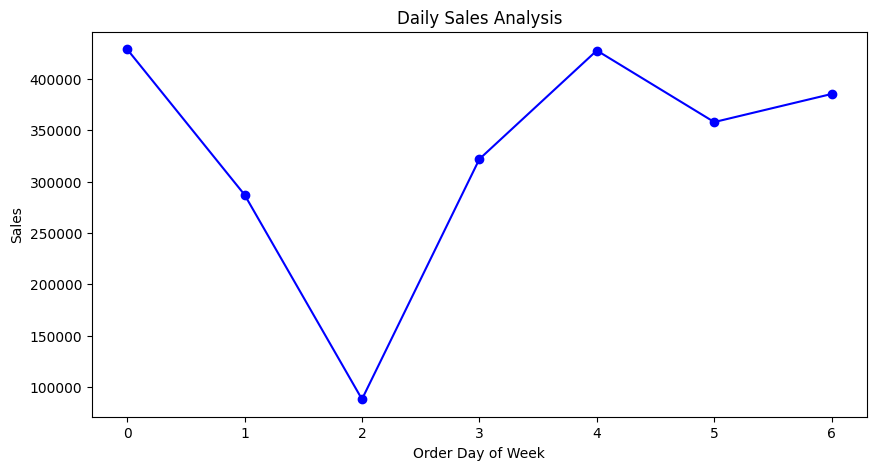

In [181]:
daily_sales = new_data.groupby('Order Day of Week')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 5))

plt.plot(daily_sales['Order Day of Week'],
         daily_sales['Sales'],
         marker='o',
         linestyle='-',
         color='b')

plt.xlabel('Order Day of Week')
plt.ylabel('Sales')
plt.title('Daily Sales Analysis')

plt.show()

Text(0.5, 1.0, 'Monthly Sales Analysis')

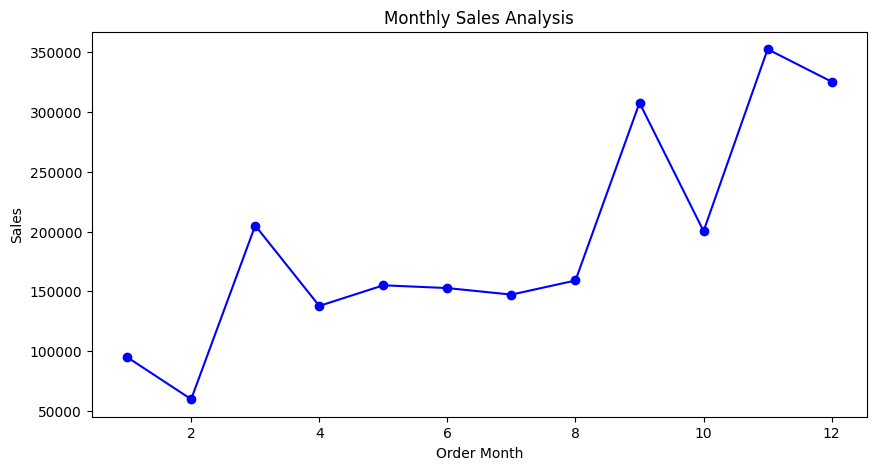

In [182]:
monthly_sales = new_data.groupby('Order Month')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))

plt.plot(monthly_sales['Order Month'],
         monthly_sales['Sales'],
         marker='o',
         linestyle='-',
         color='b')

plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Analysis')

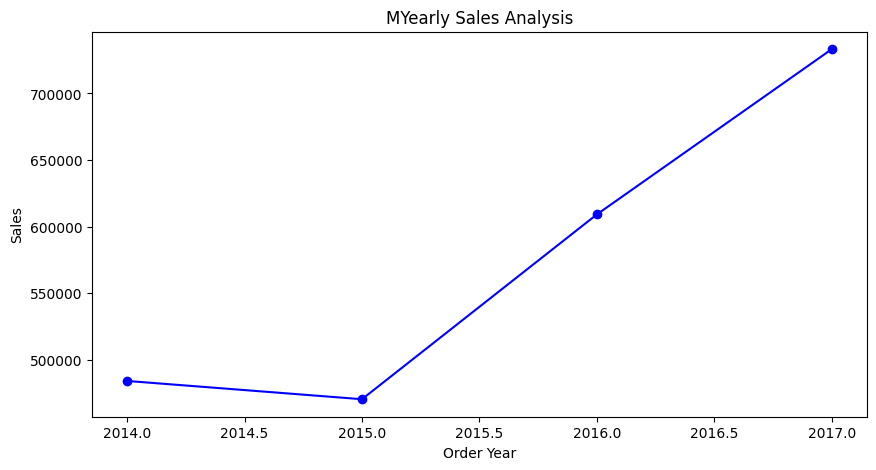

In [183]:
yearly_sales = new_data.groupby('Order Year')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))

plt.plot(yearly_sales['Order Year'],
         yearly_sales['Sales'],
         marker='o',
         linestyle='-',
         color='b')

plt.xlabel('Order Year')
plt.ylabel('Sales')
plt.title('MYearly Sales Analysis')

plt.show()

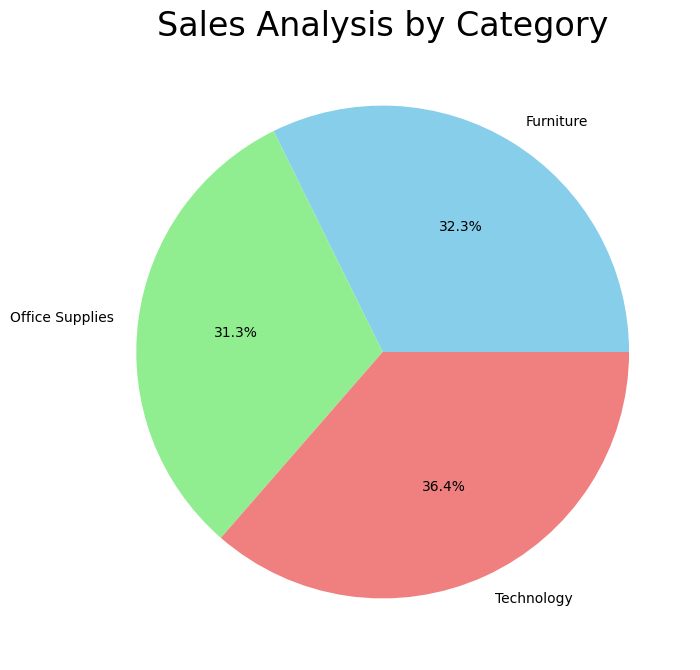

In [184]:
sales_by_category = new_data.groupby('Category')['Sales'].sum().reset_index()

plt.figure(figsize=(8, 8))

custom_colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightblue']

plt.pie(sales_by_category['Sales'],
        labels=sales_by_category['Category'],
        autopct='%1.1f%%',
        colors=custom_colors)

plt.title('Sales Analysis by Category', fontsize=24)

plt.show()

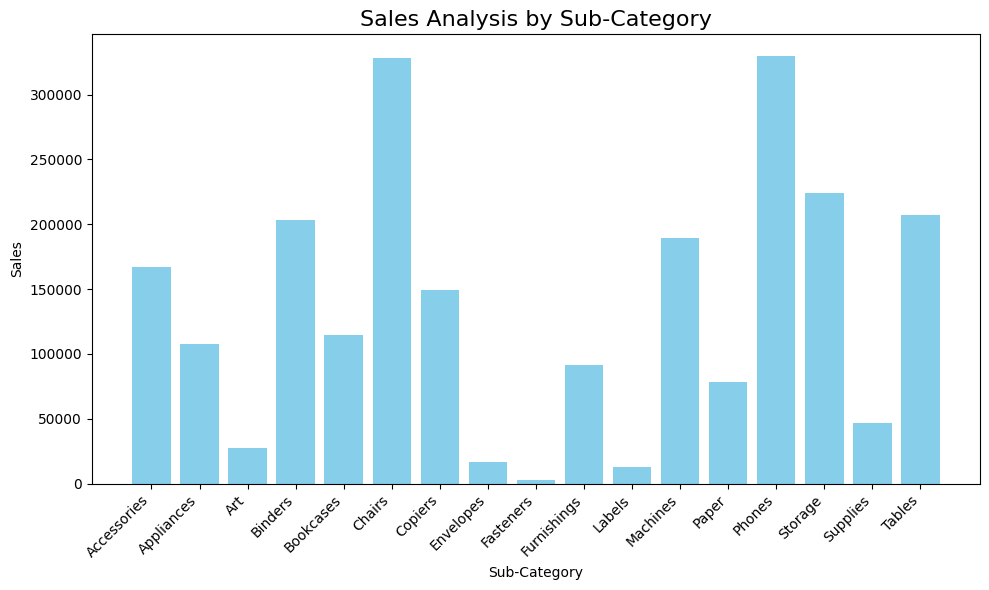

In [185]:
sales_by_subcategory = new_data.groupby('Sub-Category')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size

# Plot the bar chart
plt.bar(sales_by_subcategory['Sub-Category'], sales_by_subcategory['Sales'], color='skyblue')

# Set labels and title
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.title('Sales Analysis by Sub-Category', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Optional: Adjust the layout to prevent overlapping labels
plt.show()

The days that were the most lucrative were day 0 and day 4 as long as september and November that recorded the most monthly sales. From 2014 to 2015, the sales were not that high, but we noticed an increase form half 2015 and it kept growing up to 2017.

From the three categories of supplies that were on sale, the most sold was from the Techonologie category followed by the Furniture category and lastly the Office supplies. Among these categories, the three most sold items are phones, chairs and storage.

Now that we have analyzed the company sales, let's take a look about the company's profits.

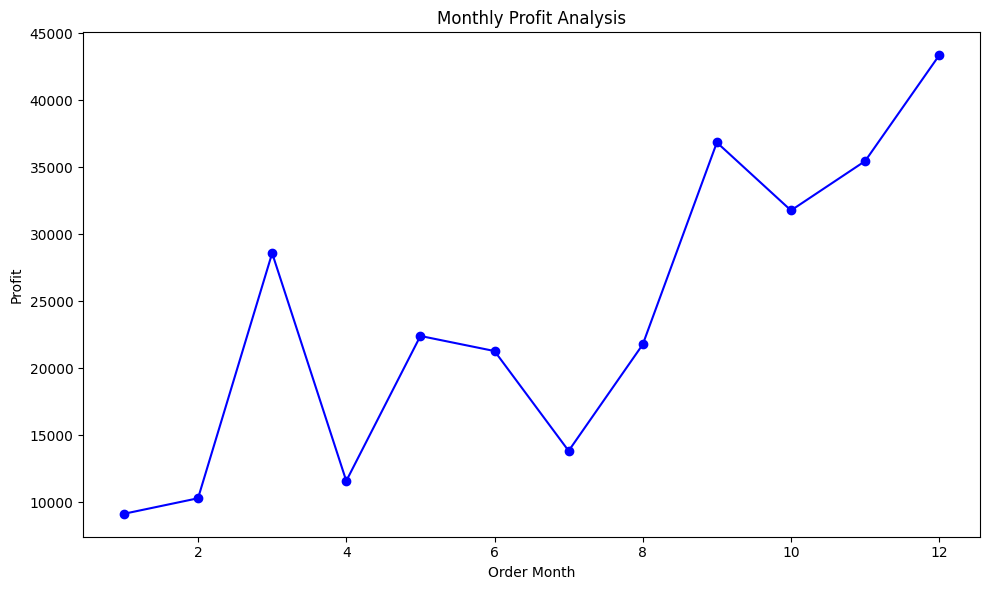

In [186]:
monthly_profit = new_data.groupby('Order Month')['Profit'].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.plot(monthly_profit['Order Month'],
         monthly_profit['Profit'],
         marker='o',
         linestyle='-',
         color='b')

plt.xlabel('Order Month')
plt.ylabel('Profit')
plt.title('Monthly Profit Analysis')

plt.tight_layout()  # Adjusting the layout to prevent overlapping labels
plt.show()

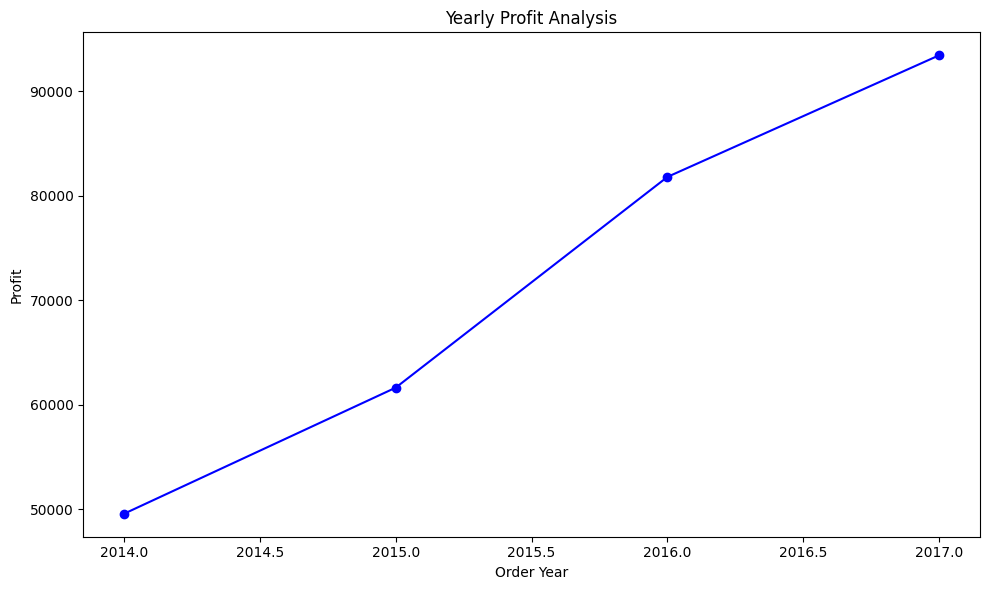

In [187]:
yearly_profit = new_data.groupby('Order Year')['Profit'].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.plot(yearly_profit['Order Year'], yearly_profit['Profit'], marker='o', linestyle='-', color='b')

plt.xlabel('Order Year')
plt.ylabel('Profit')
plt.title('Yearly Profit Analysis')


plt.tight_layout()
plt.show()

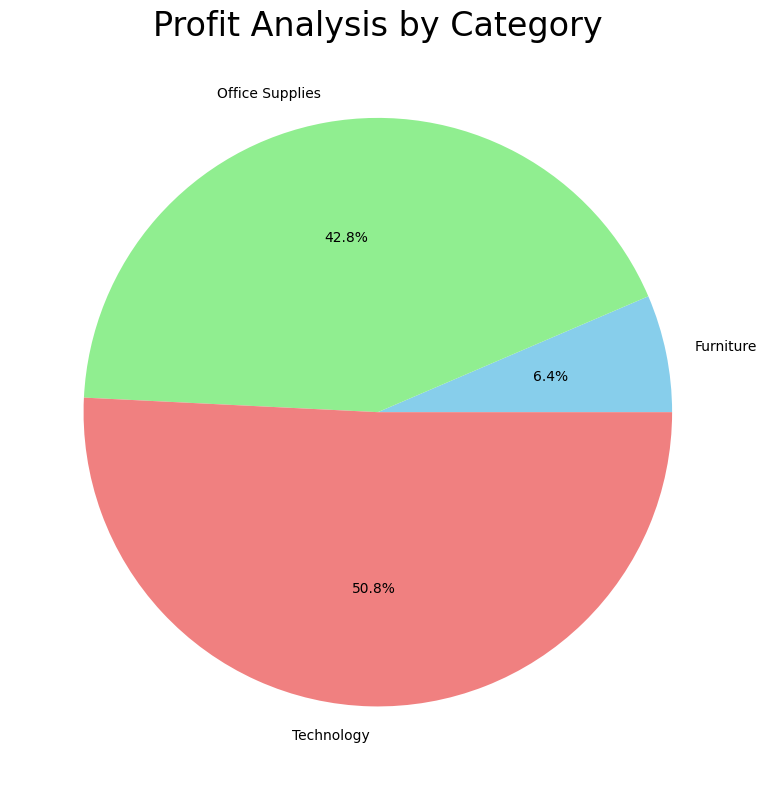

In [188]:
profit_by_category = new_data.groupby('Category')['Profit'].sum().reset_index()

plt.figure(figsize=(8, 8))

custom_colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightblue']

plt.pie(profit_by_category['Profit'], labels=profit_by_category['Category'], autopct='%1.1f%%', colors=custom_colors)

plt.title('Profit Analysis by Category', fontsize=24)

plt.tight_layout()
plt.show()

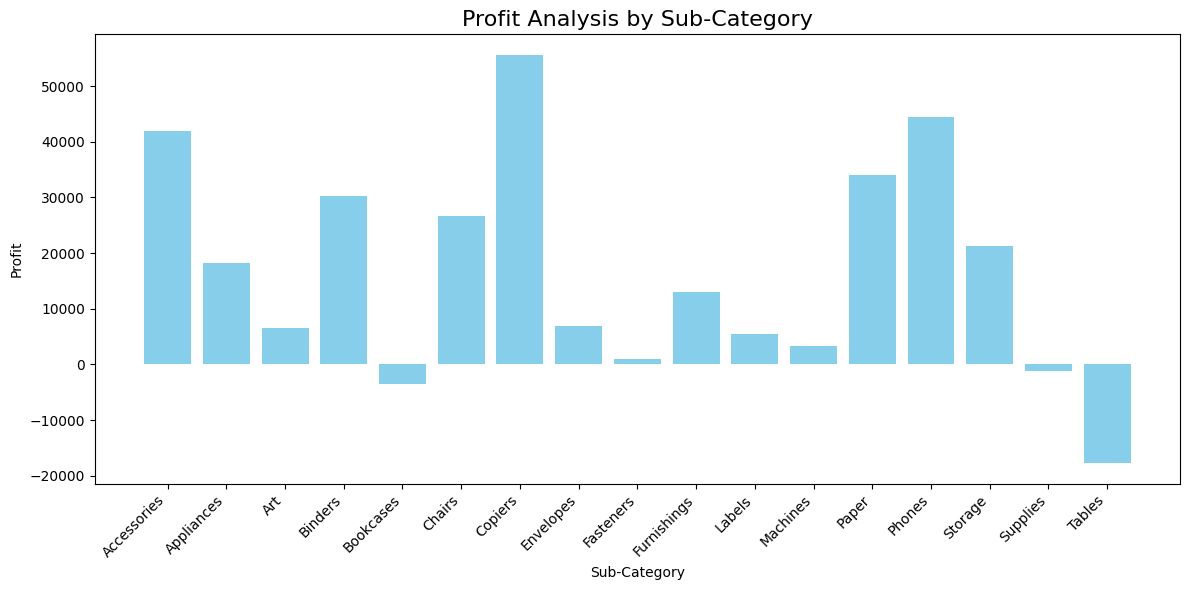

In [189]:
profit_by_subcategory = new_data.groupby('Sub-Category')['Profit'].sum().reset_index()

plt.figure(figsize=(12, 6))

plt.bar(profit_by_subcategory['Sub-Category'], profit_by_subcategory['Profit'], color='skyblue')

plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.title('Profit Analysis by Sub-Category', fontsize=16)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The items that created the most profit are the Technologie items followed by the Office supplies and the yearly profits were on constant rise from 2014 to 2017.

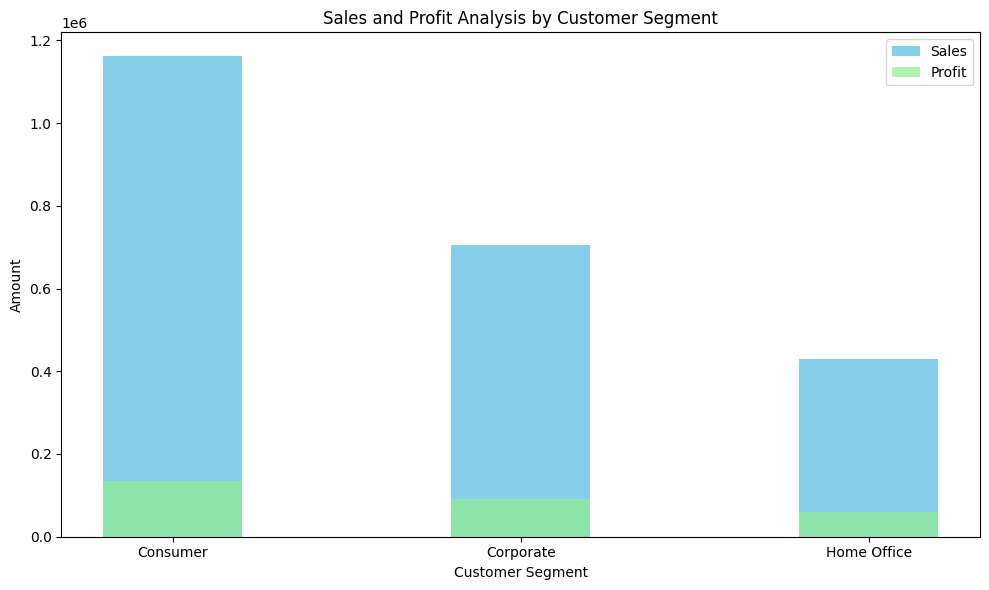

In [190]:
sales_profit_by_segment = new_data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))

custom_colors = ['skyblue', 'lightgreen']

plt.bar(sales_profit_by_segment['Segment'], sales_profit_by_segment['Sales'], width=0.4, label='Sales', color=custom_colors[0])
plt.bar(sales_profit_by_segment['Segment'], sales_profit_by_segment['Profit'], width=0.4, label='Profit', color=custom_colors[1], alpha=0.7)

plt.xlabel('Customer Segment')
plt.ylabel('Amount')
plt.title('Sales and Profit Analysis by Customer Segment')

plt.legend()

plt.tight_layout()
plt.show()

In [191]:
sales_profit_ratio_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_ratio_by_segment['Sales_to_Profit_Ratio'] = sales_profit_ratio_by_segment['Sales'] / sales_profit_ratio_by_segment['Profit']
sales_profit_ratio_by_segment[['Segment', 'Sales_to_Profit_Ratio']]

,Segment,Sales_to_Profit_Ratio
0,Consumer,8.659471
1,Corporate,7.677245
2,Home Office,7.125416


From the graph, we can see that the Consumer segment created the most profit for the store but also with an incredible amount of sales while the Corporate segmet come second.

The Sale to Profit ratio shows us that the store has a high profitability and generated a higher percentage of profit from its sales revenue.